In [1]:
#1 line detection

import cv2
import numpy as np

img = cv2.imread('2.31.png')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
cv2.imwrite('linesDetected.jpg', img)


True

In [4]:
#2- cirrcle detection

import cv2 
import numpy as np 

img = cv2.imread('eyes123.jpeg', cv2.IMREAD_COLOR) 
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

gray_blurred = cv2.blur(gray, (3, 3)) 

detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 40) 

if detected_circles is not None: 
  
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        cv2.imshow("Detected Circle", img) 
        cv2.waitKey(0) 

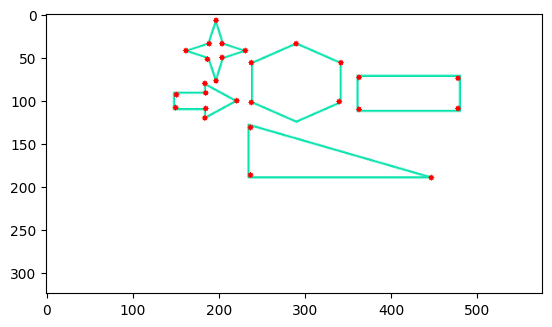

(<matplotlib.image.AxesImage at 0x189152e8e00>, None)

In [13]:
#3- detect image corner 

import numpy as np 
import cv2 
from matplotlib import pyplot as plt 

img = cv2.imread('100.png') 
  
# convert image to gray scale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10) 
corners = np.int64(corners) 

for i in corners: 
    x, y = i.ravel() 
    cv2.circle(img, (x, y), 3, 255, -1) 
  
plt.imshow(img), plt.show() 

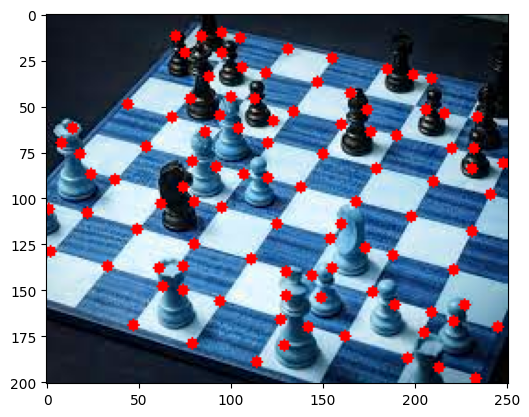

In [16]:
#4-Corner Detection with Shi-Tomasi     
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
  
img = cv2.imread('chess.jpeg') 
  
# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10) 
  
corners = np.int64(corners) 

for i in corners: 
    x, y = i.ravel() 
    cv2.circle(img, (x, y), 3, (255, 0, 0), -1) 

plt.imshow(img) 

if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows() 

In [7]:
#5- corner detection with Harris corner detection

import cv2 
import numpy as np 

image = cv2.imread('haris.png') 

operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

operatedImage = np.float32(operatedImage) 
  
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 
  
dest = cv2.dilate(dest, None) 
 
image[dest > 0.01 * dest.max()]=[0, 0, 255] 
  
cv2.imshow('Image with Borders', image) 
  
# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows() 

In [9]:
#6-find circles and ellipses in an image

import cv2 
import numpy as np 
  
image = cv2.imread('C:/Users/LAPTOPMART/Desktop/venv/6th.jpeg', 0) 
params = cv2.SimpleBlobDetector_Params() 
  
params.filterByArea = True
params.minArea = 100

params.filterByCircularity = True 
params.minCircularity = 0.9

params.filterByConvexity = True
params.minConvexity = 0.2

params.filterByInertia = True
params.minInertiaRatio = 0.01
  
# Create a detector with the parameters 
detector = cv2.SimpleBlobDetector_create(params) 
      
# Detect blobs 
keypoints = detector.detect(image) 
  
# Draw blobs on our image as red circles 
blank = np.zeros((1, 1))  
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255), 
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
  
number_of_blobs = len(keypoints) 
text = "Number of Circular Blobs: " + str(len(keypoints)) 
cv2.putText(blobs, text, (20, 550), 
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2) 
  
# Show blobs 
cv2.imshow("Filtering Circular Blobs Only", blobs) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 